In [ ]:
!pip install matplotlib --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/colab datasets/06. remaining_behavior_ext.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 34562 rows and 12 columns.


In [ ]:
missing_values = df[pd.isnull(df).any(axis=1)]

In [ ]:
missing_values# Assuming df is your DataFrame containing your dataset
df.dropna(inplace=True)  # Drops rows with NaN values


In [ ]:
missing_values

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
1117,1117,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,4.0,1.0,0.0,E
1360,1360,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,2.0,1.0,0.0,E
1776,1776,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,4.0,1.0,0.0,E
10718,10718,NaN,NaN,0.0,3,default,outlier,outlier,2.0,1.0,0.0,E
12348,12348,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,2.0,1.0,0.0,E


In [ ]:
#lebelencoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Converting categorical variable to numerical labels
le = LabelEncoder()
df['ip_type'] = le.fit_transform(df['ip_type'])
df['behavior'] = le.fit_transform(df['behavior'])
df['behavior_type'] = le.fit_transform(df['behavior_type'])
df['source'] = le.fit_transform(df['source'])


In [ ]:
df.drop(df.columns[0],axis=1,inplace=True)

In [ ]:
df.head(10)

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,7.010387,0.419355,31.0,13040,1,74,3,1.0,1.0,13.0,0
1,51.419393,0.252336,107.0,330113,1,74,3,1.0,1.0,27.0,0
2,25.860775,0.275000,40.0,62066,1,74,3,1.0,1.0,11.0,0
3,0.205909,0.818182,11.0,136,1,74,3,1.0,1.0,9.0,0
4,0.122125,0.812500,16.0,118,1,74,3,1.0,1.0,13.0,0
5,0.100778,0.238095,63.0,381,0,74,3,3.0,1.0,15.0,0
6,15.326789,0.684211,19.0,17473,1,74,3,1.0,1.0,13.0,0
7,0.401190,0.134111,343.0,8257,1,74,3,2.0,1.0,46.0,0
8,15.913862,0.077586,11.6,110761,1,40,1,57.0,10.0,9.0,0
9,0.005437,0.250000,2.0,3,3,55,1,4.0,4.0,2.0,0


# **k-nearest neighbor**

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

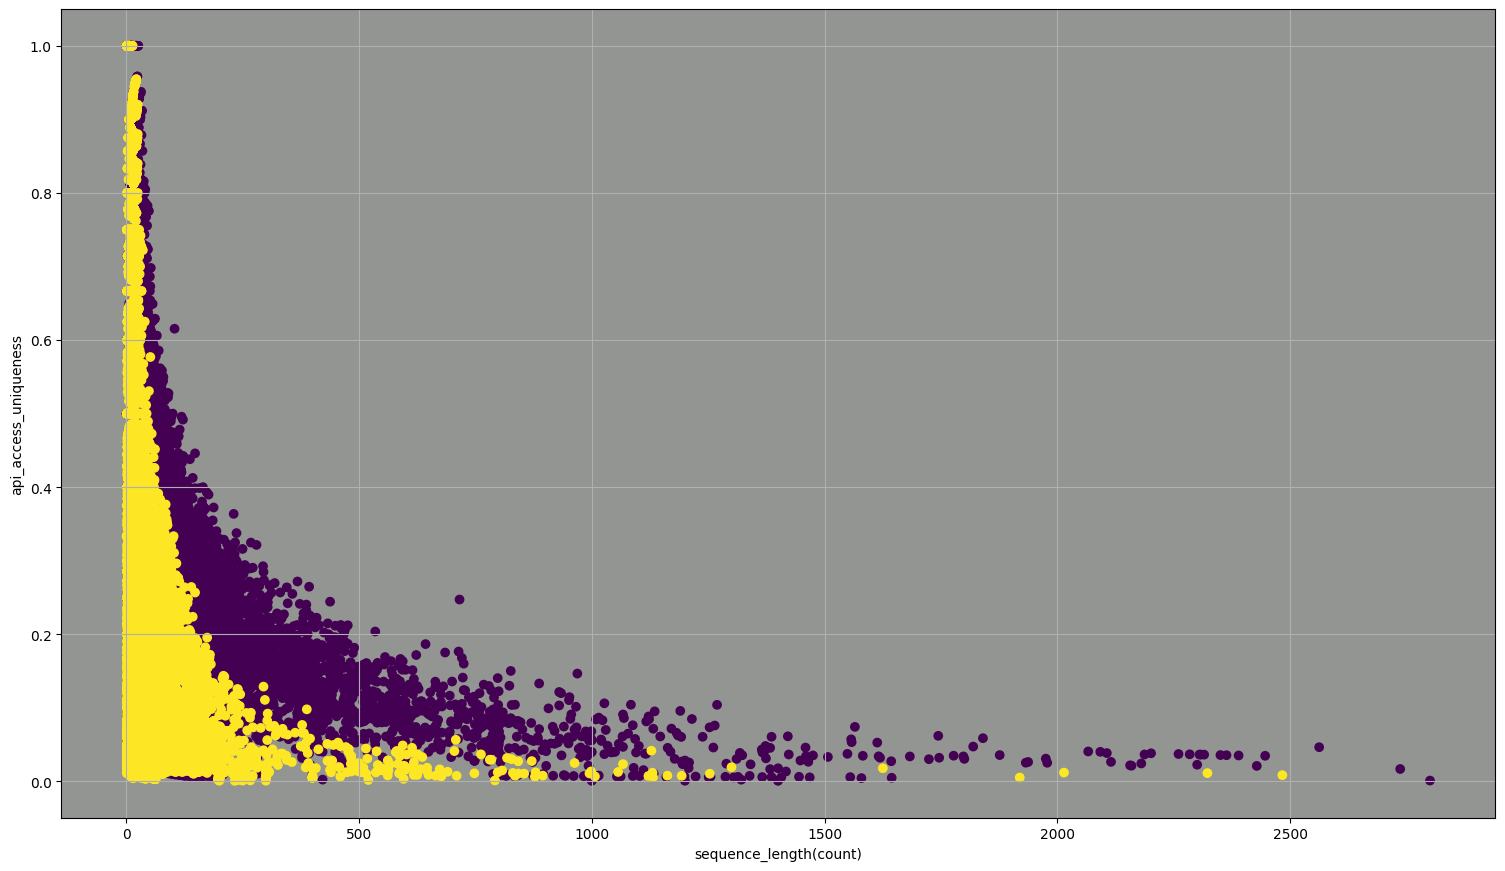

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.set_facecolor('xkcd:grey')
scatter = plt.scatter( df['sequence_length(count)'],df['api_access_uniqueness'], c=df['source'])
plt.xlabel('sequence_length(count)')
plt.ylabel('api_access_uniqueness')
plt.grid(True)
plt.show()

In [ ]:
#plot libaries
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook



layout = dict(
    yaxis=dict(
        title='api_access_uniqueness',
        automargin=True,
    ),
    xaxis=dict(
        title='sequence_length(count)',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)
# Add traces

fig.add_trace(go.Scatter(x=df['sequence_length(count)'], y=df['api_access_uniqueness'],text= df['source'],
                    mode='markers',
                    name='source',
                    hovertemplate="%{text}",
                    marker=dict(
                        size=8,
                        color = df['source'],
                        colorscale='rainbow', # one of plotly colorscales
                        showscale=True
                    ))
            )
fig.update_layout(
    autosize=False,
    width=800,
    height=800
    )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df2 = pd.DataFrame([[1200.8906, 0.765,167,42001,9,60,12,55,20,180,0],[770.678, 0.9569,200,80001,55,70,25,209,20,178,1],[947.85678, 0.91,619,35000,250,90,35,40,37,201,1]], columns=['inter_api_access_duration(sec)','api_access_uniqueness','sequence_length(count)','vsession_duration(min)','ip_type','behavior','behavior_type','num_sessions','num_users','num_unique_apis','source'])

In [ ]:
new_df = df.copy()
new_df=new_df.append(df2)

<ipython-input-24-5106121fda1c>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
#plot libaries
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook



layout = dict(
    yaxis=dict(
        title='api_access_uniqueness',
        automargin=True,
    ),
    xaxis=dict(
        title='sequence_length(count)',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)
# Add traces

fig.add_trace(go.Scatter(x=new_df['sequence_length(count)'], y=new_df['api_access_uniqueness'],text= new_df['source'],
                    mode='markers',
                    name='source',
                    hovertemplate="%{text}",
                    marker=dict(
                        size=8,
                        color = new_df['source'],
                        colorscale='rainbow', # one of plotly colorscales
                        showscale=True
                    ))
            )
fig.update_layout(
    autosize=False,
    width=800,
    height=800
    )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## **Preparing dataset to be fed into Model**



In [ ]:
y = df['source']
X = df.drop(columns=['source'])

print("Data shape: ", X.shape)
print("Labels shape: ", y.shape)#target

Data shape:  (34557, 10)
Labels shape:  (34557,)


In [ ]:
# Splittng train:test in 70:30 ratio

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)#0-255

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24189, 10)
(24189,)
(10368, 10)
(10368,)


## **COMBINATION FUNCTION**

## **Running the model**

We will run our model in different scenarios. The scenarios are as follows:

**Scenario 1** - We will train our model with **all available data** and calculate it for different $k$'s. We will also calculate the accuracy for each configuration and plot it in Matplotlib with **all available data**.

**Scenario 2** - We will train our model with **training dataset** and calculate it for different $k$'s. We will also calculate the accuracy for each configuration and plot it in Matplotlib with our **testing dataset**.

### **Scenario 1 - Training and testing with all available data**

In [ ]:
# Assuming df is your DataFrame containing your dataset
print(df.isnull().sum())  # This will display the count of NaN values in each column

inter_api_access_duration(sec)    0
api_access_uniqueness             0
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
behavior                          0
behavior_type                     0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors


score = []

for n_neighbors in range(2,21):
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.                uniform =unweighted data  distance=weighted
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)
        score.append(clf.score(X,y))

score = np.reshape(score,(-1,2))

In [ ]:
score

array([[0.85354631, 0.99901612],
       [0.85797378, 0.99901612],
       [0.81442255, 0.99901612],
       [0.8213676 , 0.99901612],
       [0.7964233 , 0.99901612],
       [0.79946176, 0.99901612],
       [0.78238852, 0.99901612],
       [0.78655555, 0.99901612],
       [0.7745464 , 0.99901612],
       [0.77726655, 0.99901612],
       [0.76820905, 0.99901612],
       [0.76956912, 0.99901612],
       [0.76190063, 0.99901612],
       [0.76453396, 0.99901612],
       [0.75822554, 0.99901612],
       [0.75732847, 0.99901612],
       [0.75292994, 0.99901612],
       [0.75411639, 0.99901612],
       [0.74916804, 0.99901612]])

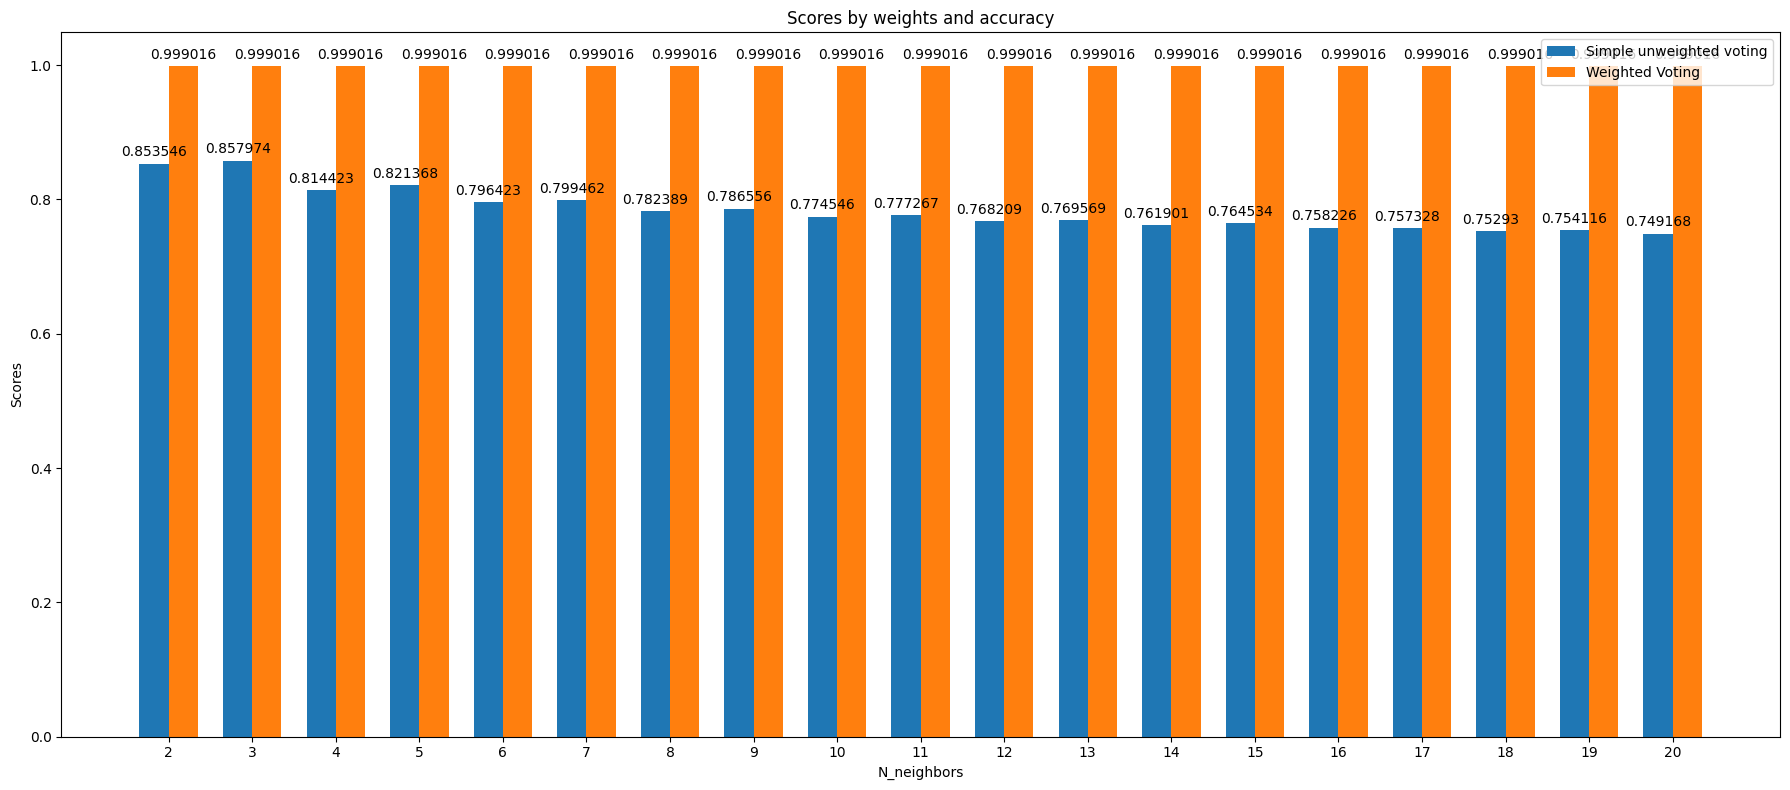

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = np.arange(2, 21, 1)
uniform = score[:, 0::2].reshape(-1).tolist()
distance = score[:, 1::2].reshape(-1).tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars



fig, ax = plt.subplots(figsize=(18,8))
rects1 = ax.bar(x - width/2, uniform, width, label='Simple unweighted voting')
rects2 = ax.bar(x + width/2, distance, width, label='Weighted Voting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('N_neighbors')
ax.set_ylabel('Scores')
ax.set_title('Scores by weights and accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### **Scenario 2 - Training with training data($70\%$) and testing with testing data($30\%$)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors

score = []

for n_neighbors in range(2,21):
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train, y_train)
        score.append(clf.score(X_test,y_test))

score = np.reshape(score,(-1,2))

In [ ]:
score

array([[0.71421682, 0.70997299],
       [0.7181713 , 0.71759259],
       [0.71199846, 0.72193287],
       [0.71383102, 0.71826775],
       [0.7113233 , 0.72202932],
       [0.71344522, 0.72019676],
       [0.7105517 , 0.72434414],
       [0.7109375 , 0.72222222],
       [0.70862269, 0.72328318],
       [0.70794753, 0.72231867],
       [0.70408951, 0.72202932],
       [0.70679012, 0.72357253],
       [0.70380015, 0.72395833],
       [0.70322145, 0.72135417],
       [0.70158179, 0.72173997],
       [0.7033179 , 0.71961806],
       [0.69917052, 0.72067901],
       [0.70013503, 0.72125772],
       [0.69810957, 0.72299383]])

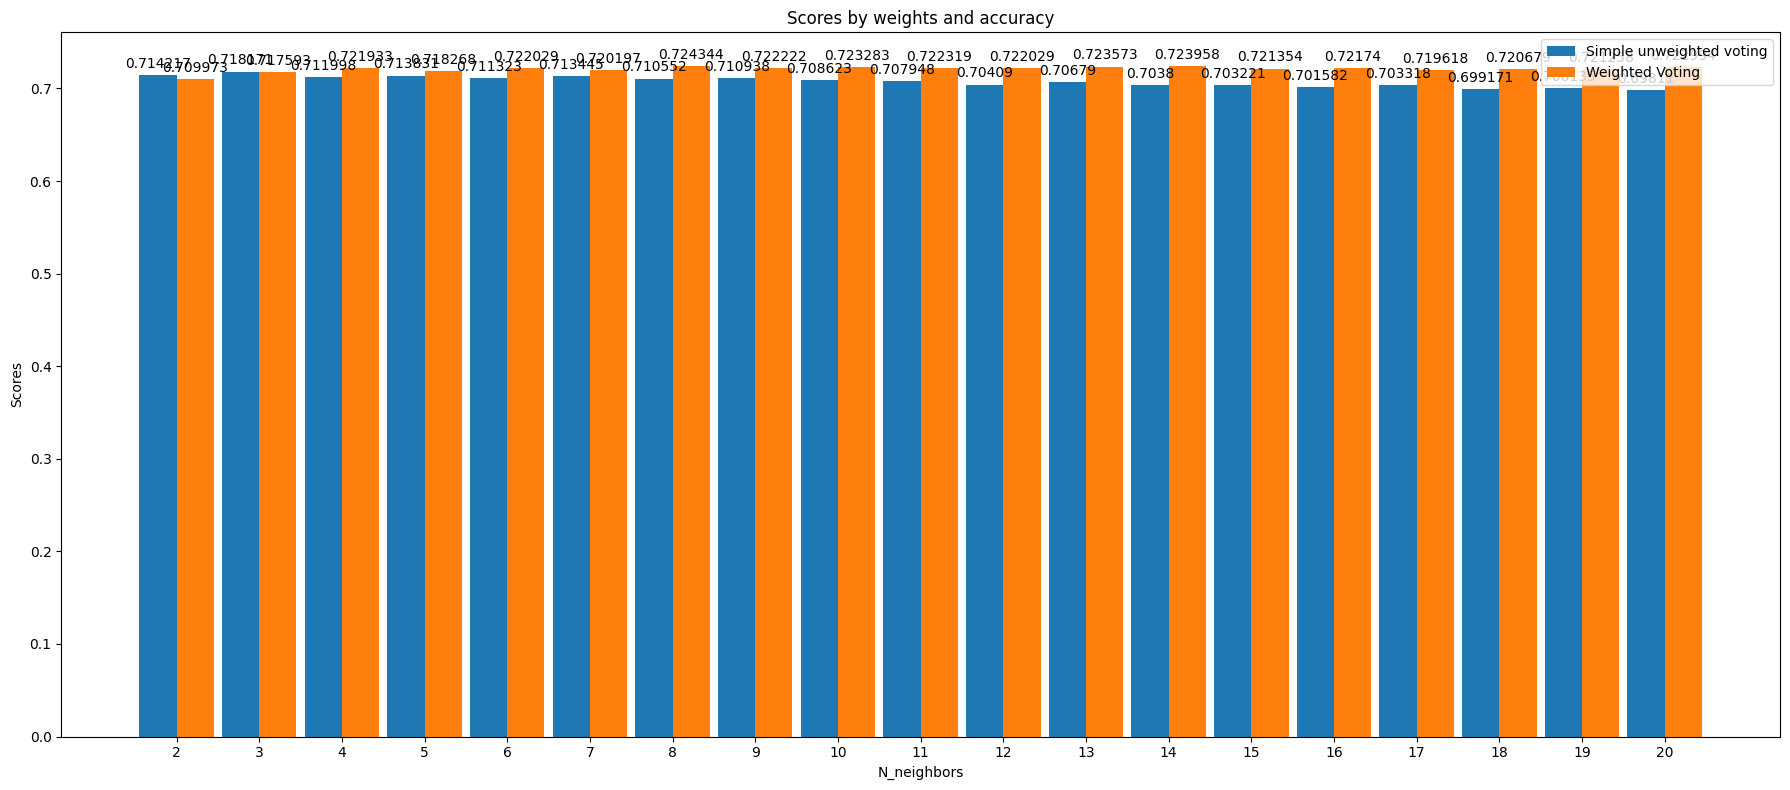

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = np.arange(2, 21, 1)
uniform = score[:, 0::2].reshape(-1).tolist()
distance = score[:, 1::2].reshape(-1).tolist()
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars



fig, ax = plt.subplots(figsize=(18,8))
rects1 = ax.bar(x - width/2, uniform, width, label='Simple unweighted voting')
rects2 = ax.bar(x + width/2, distance, width, label='Weighted Voting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('N_neighbors')
ax.set_ylabel('Scores')
ax.set_title('Scores by weights and accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### **Checking for individual predictions that our model has made**



In [ ]:
pred_labels = clf.predict(df2.drop(columns=["source"]))

In [ ]:
pred_labels

array([0, 1, 0])